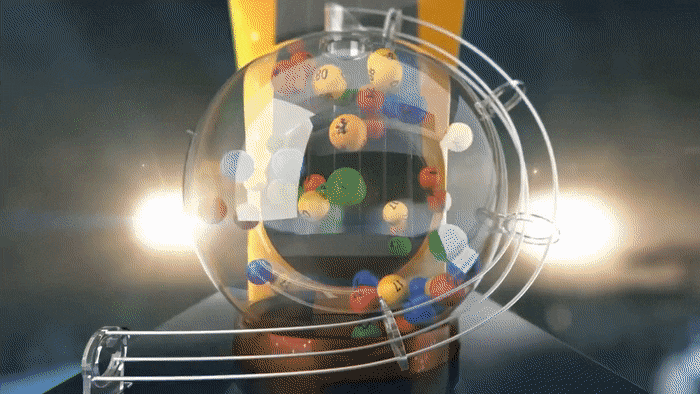

### Project: Mobile App for Lottery Addiction

__Scope of Project:__

In this project I am working with a fictional medical institution that is looking to create a mobile app to help people suffering from gambling addictions. Many people begin playing the lottery for fun but it can eventually turn into a gambling addiction. This addiction can come at great financial costs such as spending their life savings, taking out loans, and even lead to crime. 

The medical institution wants to build a dedicated mobile app that will help combat this addiction. They already have a dedicated team of engineers to create the application but they need help creating the logical core of the app that calculates the probabilities. 

For the first version of the app they want to focus on 6/49 lottery game from Canada and build functions that answer questions like: 

* What is the probability of winning the big prize with a single ticket?
* What is the probability of winning the big prize if we play 40 different tickets (or any other number)?
* What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?

The dataset being used can be found here on [Kaggle Lottery Dataset](https://www.kaggle.com/datasets/datascienceai/lottery-dataset). This dataset covers lottery drawings from 1982 to 2018. 

In the 6/49 lottery, six numbers are drawn from a set of 49 numbers that range from 1 to 49. The drawing is done without replacement, which means once a number is drawn, it's not put back in the set.


#### Quick exploration of the dataset and creating functions that will be needed:

In [67]:
import pandas as pd 
import numpy as np 

lottery_data = pd.read_csv('649.csv')

lottery_data.head()

PRODUCT  DRAW NUMBER  SEQUENCE NUMBER  DRAW DATE  NUMBER DRAWN 1  \
0      649            1                0  6/12/1982               3   
1      649            2                0  6/19/1982               8   
2      649            3                0  6/26/1982               1   
3      649            4                0   7/3/1982               3   
4      649            5                0  7/10/1982               5   

   NUMBER DRAWN 2  NUMBER DRAWN 3  NUMBER DRAWN 4  NUMBER DRAWN 5  \
0              11              12              14              41   
1              33              36              37              39   
2               6              23              24              27   
3               9              10              13              20   
4              14              21              31              34   

   NUMBER DRAWN 6  BONUS NUMBER  
0              43            13  
1              41             9  
2              39            34  
3              43            34  
4              47            45

In [68]:
lottery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PRODUCT          3665 non-null   int64 
 1   DRAW NUMBER      3665 non-null   int64 
 2   SEQUENCE NUMBER  3665 non-null   int64 
 3   DRAW DATE        3665 non-null   object
 4   NUMBER DRAWN 1   3665 non-null   int64 
 5   NUMBER DRAWN 2   3665 non-null   int64 
 6   NUMBER DRAWN 3   3665 non-null   int64 
 7   NUMBER DRAWN 4   3665 non-null   int64 
 8   NUMBER DRAWN 5   3665 non-null   int64 
 9   NUMBER DRAWN 6   3665 non-null   int64 
 10  BONUS NUMBER     3665 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 315.1+ KB


In [69]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1):
        final_product *= i
    return final_product
 
def permutation(n, k):
    numerator = factorial(n)
    denominator = factorial(n-k)
    return numerator/denominator

def combinations(n, k):
    numerator = factorial(n)
    denominator = factorial(k) * factorial(n-k)
    return numerator/denominator


#### One-ticket Probability: 

For the first version of the app, we want players to be able to calculate the probability of winning the big prize with the various numbers they play on a single ticket (for each ticket a player chooses six numbers out of 49). So, we'll start by building a function that calculates the probability of winning the big prize for any given ticket.

We discussed with the engineering team of the medical institute, and they told us we need to be aware of the following details when we write the function:

* Inside the app, the user inputs six different numbers from 1 to 49.
* Under the hood, the six numbers will come as a Python list, which will serve as the single input to our function.
* The engineering team wants the function to print the probability value in a friendly way — in a way that people without any probability training are able to understand.

In [70]:
def one_ticket_probability(numbers): 
    c = combinations(49, 6)
    outcome = 1
    probability = outcome/c 
    probability_percentage = probability * 100
    print('''You have a 1 in {:,} or {:.7f}% chance of winning with {}.'''.format(c, probability_percentage, numbers))

sample_numbers = [3,18,36,48,32,5]
sample_two = [9,35,38,43,2,15]

print(one_ticket_probability(sample_numbers))
print(one_ticket_probability(sample_two))

You have a 1 in 13,983,816.0 or 0.0000072% chance of winning with [3, 18, 36, 48, 32, 5].
None
You have a 1 in 13,983,816.0 or 0.0000072% chance of winning with [9, 35, 38, 43, 2, 15].
None


Created a function that takes in a set of 6 numbers and prints out the probability of winning the lotto with one ticket with the percentage chance of winning. I tested the function with a random set of 6 numbers to make sure the printout generates accurately.

#### Function for Historical Data Check:

We're going to write a function that will enable users to compare their ticket against the historical lottery data in Canada and determine whether they would have ever won by now.

The engineering team told us that we need to be aware of the following details:

* Inside the app, the user inputs six different numbers from 1 to 49.
* Under the hood, the six numbers will come as a Python list and serve as an input to our function.
* The engineering team wants us to write a function that prints:
* the number of times the combination selected occurred in the Canada data set; and
* the probability of winning the big prize in the next drawing with that combination.

In [71]:
#extracting historical winning numbers

def extract_numbers(row):
    row = row[['NUMBER DRAWN 1', 'NUMBER DRAWN 2', 'NUMBER DRAWN 3', 'NUMBER DRAWN 4', 'NUMBER DRAWN 5', 'NUMBER DRAWN 6']]
    row = set(row.values)
    return row 

historical_winnings = lottery_data.apply(extract_numbers, axis=1)

print(historical_winnings.describe)

<bound method NDFrame.describe of 0        {3, 41, 11, 12, 43, 14}
1        {33, 36, 37, 39, 8, 41}
2         {1, 6, 39, 23, 24, 27}
3         {3, 9, 10, 43, 13, 20}
4        {34, 5, 14, 47, 21, 31}
                  ...           
3660    {38, 40, 41, 10, 15, 23}
3661    {36, 46, 47, 19, 25, 31}
3662     {32, 34, 6, 22, 24, 31}
3663     {2, 38, 15, 49, 21, 31}
3664    {35, 37, 14, 48, 24, 31}
Length: 3665, dtype: object>


In [72]:
#creating function that compares the user input numbers against historical winning numbers. 

def check_historical_occurence(numbers, historical_winnings): 
    numbers = set(numbers)
    matching = numbers == historical_winnings
    historical_occurence = matching.sum()
    
    if historical_occurence == 0: 
        print('''The combination of {} has never occured before. This does not guarentee that this will be a winning 
        combination. You have a 1 in 13,983,816 or 0.0000072% of winning with {}'''.format(numbers,numbers))
    
    else: 
        print('''The combination of {} has occured {} time(s) before. This does not guarentee that this will be a winning 
        combination. You have a 1 in 13,983,816 or 0.0000072% of winning with {}'''.format(numbers,historical_occurence, numbers))

In [73]:
#testing the function 

sample_numbers = [3,18,36,48,32,5]
sample_two = [9,35,38,43,2,15]
sample_three = [33, 36, 37, 39, 8, 41]

display (check_historical_occurence(sample_numbers, historical_winnings))

display (check_historical_occurence(sample_two, historical_winnings))

display (check_historical_occurence(sample_three, historical_winnings))

The combination of {32, 3, 36, 5, 48, 18} has never occured before. This does not guarentee that this will be a winning 
        combination. You have a 1 in 13,983,816 or 0.0000072% of winning with {32, 3, 36, 5, 48, 18}


None

The combination of {2, 35, 38, 9, 43, 15} has never occured before. This does not guarentee that this will be a winning 
        combination. You have a 1 in 13,983,816 or 0.0000072% of winning with {2, 35, 38, 9, 43, 15}


None

The combination of {33, 36, 37, 39, 8, 41} has occured 1 time(s) before. This does not guarentee that this will be a winning 
        combination. You have a 1 in 13,983,816 or 0.0000072% of winning with {33, 36, 37, 39, 8, 41}


None

Created a function that took in a set of numbers and checked them against historical winnings. Giving 2 different read outs for the user. 

#### Multi-ticket Probability:

Lottery addicts usually play more than one ticket on a single drawing, thinking that this might increase their chances of winning. This function will help to give them a better estimate of their chances of winning. 

We've talked with the engineering team and they gave us the following information:

* The user will input the number of different tickets they want to play (without inputting the specific combinations they intend to play).
* Our function will see an integer between 1 and 13,983,816 (the maximum number of different tickets).
* The function should print information about the probability of winning the big prize depending on the number of different tickets played.

In [74]:
def multi_ticket_probability(number): 
    combo = combinations(49,6)
    success = number 
    successful_outcomes = success/combo 
    outcomes_percent = successful_outcomes * 100 
    
    if number == 1: 
        print('''Purchasing {} ticket(s) gives you a {:.7f}% chance of winning the lottery'''.format(number, outcomes_percent)) 
    else:
        new_outcome = int(combo/success)
        print('''Purchasing {} ticket(s) gives you a {:.7f}%  chance of winning the lottery'''.format(number, outcomes_percent))

In [75]:
#testing the function

sample = 1, 10, 100, 10000, 1000000, 6991908, 13983816

multi_ticket_probability(1)
multi_ticket_probability(10)
multi_ticket_probability(100)
multi_ticket_probability(10000)
multi_ticket_probability(6991908)
multi_ticket_probability(13983816)

Purchasing 1 ticket(s) gives you a 0.0000072% chance of winning the lottery
Purchasing 10 ticket(s) gives you a 0.0000715%  chance of winning the lottery
Purchasing 100 ticket(s) gives you a 0.0007151%  chance of winning the lottery
Purchasing 10000 ticket(s) gives you a 0.0715112%  chance of winning the lottery
Purchasing 6991908 ticket(s) gives you a 50.0000000%  chance of winning the lottery
Purchasing 13983816 ticket(s) gives you a 100.0000000%  chance of winning the lottery


Created a function that took in a number of tickets to give the percentage chance of winning the lottery. Showing the user the amount of tickets and percentage to win. 

#### Less Winning Numbers — Function

The last function will be to allow the users to calculate probabilities for two, three, four, or five winning numbers.

For extra context, in most 6/49 lotteries there are smaller prizes if a player's ticket match two, three, four, or five of the six numbers drawn. As a consequence, the users might be interested in knowing the probability of having two, three, four, or five winning numbers.

These are the engineering details we'll need to be aware of:

* Inside the app, the user inputs:
* an integer between 2 and 5 that represents the number of winning numbers expected
* Our function prints information about the probability of having the inputted number of winning numbers.

In [104]:
def probability_less_6(numbers):
    combo = combinations(49,6)
    poss = {}

    for n in range(2,6):
        c = combinations(6, n) 
        remainder = combinations(43, 6 - n)
        outcome = c * remainder
        poss[n] = outcome
    
    if numbers in poss:
        probable = poss[numbers]
        probability = probable/ combo
        probability_percentage = probability  * 100
        new_possible = int(combo / probable)
    
    print('''You have a 1 in {:,} chance, or a {:.4f}% chance of having {} winning numbers on a ticket.'''
          .format(new_possible, probability_percentage, numbers))
    
    


In [106]:
# testing function 
probability_less_6(2)
probability_less_6(3)
probability_less_6(4)
probability_less_6(5)

You have a 1 in 7 chance, or a 13.2378% chance of having 2 winning numbers on a ticket.
You have a 1 in 56 chance, or a 1.7650% chance of having 3 winning numbers on a ticket.
You have a 1 in 1,032 chance, or a 0.0969% chance of having 4 winning numbers on a ticket.
You have a 1 in 54,200 chance, or a 0.0018% chance of having 5 winning numbers on a ticket.


### Conclusion: 

In this project I have successfully completed 4 different functions for the new lottery addiction application. 

* Winning the lottery on 1 ticket
* Comparing user lotto numbers to historical data
* Winning the lottery on purchasing multiple tickets
* Probability of getting a prize with 2-5 winning numbers. 

Now the engineers of the fictitious medical institution have the functions that they can include in their first mobile app release. 